In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis

In [2]:
logins = pd.read_json('logins.json')

In [3]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [4]:
logins.head(10)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
5,1970-01-01 20:21:41
6,1970-01-01 20:12:16
7,1970-01-01 20:35:47
8,1970-01-01 20:35:38
9,1970-01-01 20:47:52


In [5]:
logins.tail()

,login_time
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


The timestamps are not in perfect chronological order. It will be easier to work with them if they are, so I'm going to go ahead and sort them in order.

In [6]:
logins = logins.sort_values('login_time').reset_index(drop=True)
logins

,login_time
0,1970-01-01 20:12:16
1,1970-01-01 20:13:18
2,1970-01-01 20:16:10
3,1970-01-01 20:16:36
4,1970-01-01 20:16:37
...,...
93137,1970-04-13 18:48:52
93138,1970-04-13 18:50:19
93139,1970-04-13 18:54:02
93140,1970-04-13 18:54:23


In [7]:
df = logins.resample('15Min', on = 'login_time').count()
# df.login_time = pd.to_datetime(df.login_time, infer_datetime_format = True)
df = df.rename(columns = {'login_time': '# of logins'}).reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9788 entries, 0 to 9787
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   login_time   9788 non-null   datetime64[ns]
 1   # of logins  9788 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 153.1 KB


It will also be helpful to know which day of the week corresponds to each date, so I'm going to create another column for our dataframe and assign the name of the weekday.

In [8]:
df['weekday'] = df['login_time'].dt.dayofweek
df['weekday'] = df['weekday'].map({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'})
df

,login_time,# of logins,weekday
0,1970-01-01 20:00:00,2,Thursday
1,1970-01-01 20:15:00,6,Thursday
2,1970-01-01 20:30:00,9,Thursday
3,1970-01-01 20:45:00,7,Thursday
4,1970-01-01 21:00:00,1,Thursday
...,...,...,...
9783,1970-04-13 17:45:00,5,Monday
9784,1970-04-13 18:00:00,5,Monday
9785,1970-04-13 18:15:00,2,Monday
9786,1970-04-13 18:30:00,7,Monday


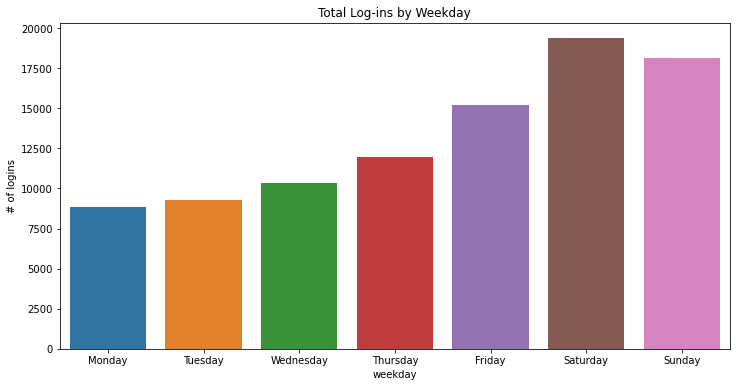

In [9]:
count_by_weekday = df.groupby('weekday').agg('sum').reset_index()
wkday_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize = (12, 6))
sns.barplot(x = 'weekday', y = '# of logins', data = count_by_weekday, order = wkday_list)
plt.title('Total Log-ins by Weekday')
plt.show()


The log-in counts of each weekday already show us that log-ins increase over the course of the week, peaking on the weekends, Saturday in particular.

I want to be able to group by both dates and time intervals, so it may make things easier to work with if I split my 'login time' column up in to 2 separate columns, 'date' and 'time'.

In [10]:
df['date'] = pd.to_datetime(df.login_time).dt.date
df['time'] = pd.to_datetime(df.login_time).dt.time
df = df[['date', 'time', 'weekday', '# of logins']]
df

,date,time,weekday,# of logins
0,1970-01-01,20:00:00,Thursday,2
1,1970-01-01,20:15:00,Thursday,6
2,1970-01-01,20:30:00,Thursday,9
3,1970-01-01,20:45:00,Thursday,7
4,1970-01-01,21:00:00,Thursday,1
...,...,...,...,...
9783,1970-04-13,17:45:00,Monday,5
9784,1970-04-13,18:00:00,Monday,5
9785,1970-04-13,18:15:00,Monday,2
9786,1970-04-13,18:30:00,Monday,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         103 non-null    object
 1   # of logins  103 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


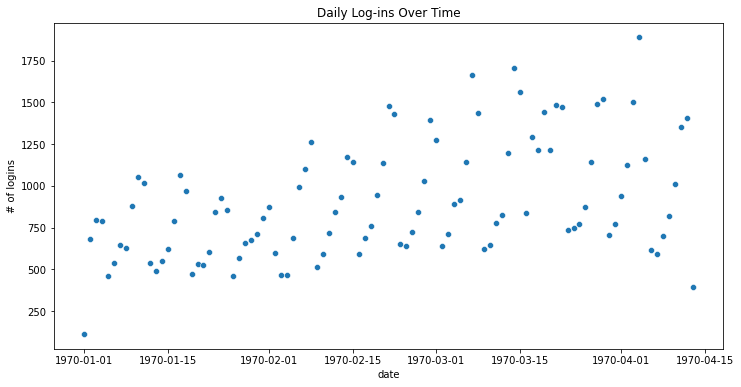

In [14]:
count_by_date = df.groupby('date').agg('sum').reset_index()
count_by_date.info()

plt.figure(figsize=(12, 6))
sns.scatterplot(x = 'date', y = '# of logins', data = count_by_date)
plt.title('Daily Log-ins Over Time')
plt.show()

We can see a gradual increase in log-ins per day as we move from January to early April.

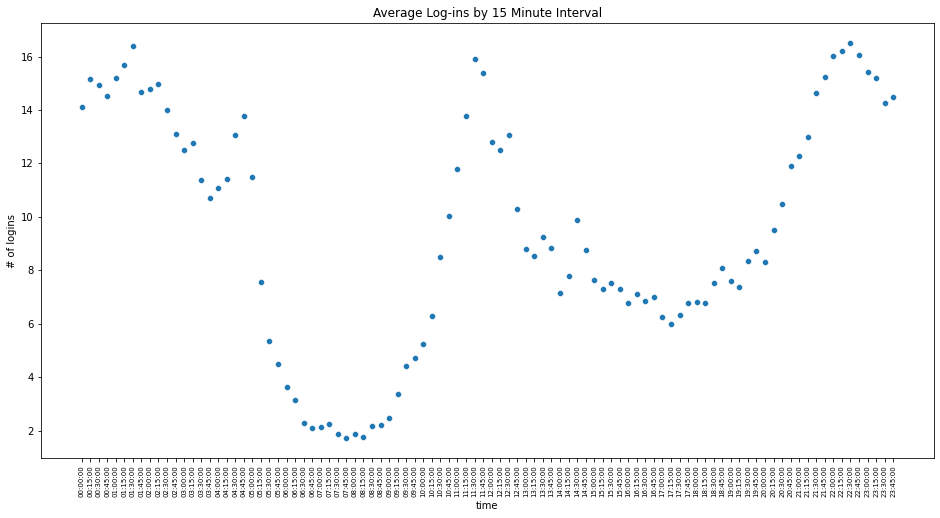

In [45]:
count_by_int = df.groupby('time').agg('mean').reset_index()
count_by_int['time'] = count_by_int['time'].astype(str)

plt.figure(figsize=(16, 8))
sns.scatterplot(x = 'time', y = '# of logins', data = count_by_int)
plt.xticks(rotation=90, fontsize=7)
plt.title('Average Log-ins by 15 Minute Interval')
plt.show()

In [42]:
count_by_int.nlargest(10, '# of logins')

,time,# of logins
90,22:30:00,16.509804
6,01:30:00,16.401961
89,22:15:00,16.196078
91,22:45:00,16.049020
88,22:00:00,16.019608
46,11:30:00,15.901961
5,01:15:00,15.666667
92,23:00:00,15.421569
47,11:45:00,15.392157
87,21:45:00,15.235294


In [46]:
count_by_int.nsmallest(10, '# of logins')

,time,# of logins
31,07:45:00,1.715686
33,08:15:00,1.754902
32,08:00:00,1.872549
30,07:30:00,1.882353
27,06:45:00,2.098039
28,07:00:00,2.147059
34,08:30:00,2.166667
35,08:45:00,2.225490
29,07:15:00,2.245098
26,06:30:00,2.303922


My scatterplot shows 3 distinct peaks during the day for log-ins, a first peak in the first hours of the day from around 01:00 to 02:00 and then a 2nd peak right around 11:00 to 12:00 hour. There is then a a 3rd peak from around 22:00 to 23:00, which makes for the busiest hour on average during the entire day, as 4 of the 5 intervals with the largest # of log-ins occurs during this time.

In terms of the least busiest times, our 10 least busiest interals ALL fall within the morning hours between 6:30 to 8:30.  While there is a peak at lunch and then a gradual drop in traffic after 12:00 that bottoms out around 17:00, the afternoon low is still about 3 times as busy as the morning low.


# Experiment and Metrics Design

1) I would use as my metric the # (or percentage) of drivers that gave rides in both cities within a specific timespan. I would choose this metric because the goal is to have more drivers covering both cities, and tracking this will tell us if that is occurring.

2) Assuming I have records on the location and # of driver trips per day for each driver, I would compare this data from before the experiment was implemented with the data from after implementation. I would be looking for an uptick in the # of drivers taking trips in both cities, and would use an A/B test to look for statistical significance in any difference I do find. I would test the null hypothesis that the experiment made no difference in daily #'s, and use permutation sampling to come up with a P-value, which would assess the probability that my null hypothesis could be wrong, given the results found.  Only with a P-value of below .05 could I reject the null hypothesis and ascertain that it is most likely that the experiment did determine the found differences.